<a href="https://colab.research.google.com/github/mhdelta/machineLearningUtp/blob/master/simpleRegressionFirstLaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1
## Modelos de regresión líneal

Sea un conjunto de entrenamiento $\bf{x} = {x1, \dots,xn}$

El modelo de regresión de máxima verosimilitud se encuentra cuando 

El modelo es la matriz de diseño por las etiquetas

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

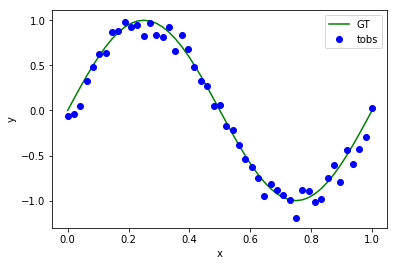

In [71]:
N = 49 #@param {type:"slider", min:0, max:100, step:1}
x = np.linspace(0, 1, N)
#print(N)
t_real = np.sin(2*np.pi*x)
t_obs = t_real +  + 0.1 * np.random.randn(N)


plt.plot(x, t_real, '-g')
plt.plot(x, t_obs, 'ob')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('GT', 'tobs'))

Necesito encontrar w, pero para esto necesito la matriz de diseño
Pero para hacer eso tengo que crear la función base


In [0]:
# creo la matriz de diseño

def fbasePoli(xtrain, M, func):
  auxPhiVect = np.zeros(M)
  indM = np.linspace(0, M-1, M) #Indices de m
  if func == "poli":
    auxPhiVect = np.power(xtrain, indM)
  return auxPhiVect

def desingMatrix(datos,M):
  auxMPHI = np.zeros((N, M))
  for n in range(0,N):
    auxMPHI[n, :] = fbasePoli(datos[n], M, "poli")
  return auxMPHI

In [78]:
# Calcular la matriz phi
numfuncbase = 10
MPHI = desingMatrix(x, numfuncbase)
MPHIT = MPHI.T
w_ml = np.linalg.inv(MPHIT@MPHI).dot(MPHIT@t_obs)
print("El modelo w_ml es: ", w_ml)

El modelo w_ml es:  [-8.35574601e-02 -1.52450707e-02  1.71748567e+02 -1.61566543e+03
  7.09523431e+03 -1.78120742e+04  2.64574672e+04 -2.28211456e+04
  1.05217172e+04 -1.99719703e+03]


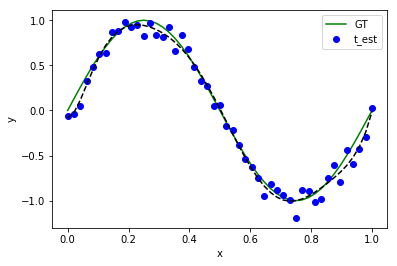

In [79]:
# Se realiza la predicción de las etiquetas


yEst = MPHI@(w_ml)

plt.plot(x, t_real, '-g')
plt.plot(x, t_obs, 'ob')
plt.plot(x, yEst, '--k')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('GT', 't_est'))



In [83]:
# Error mse

error_mse = 0.5*(t_real-yEst).dot(t_real-yEst)
print("Error mse: ", error_mse)

# El grado de correlación cuadrático debe ser de 98
from sklearn.metrics import r2_score

print("r2: ", r2_score(t_real, yEst))


Error mse:  0.08671301194347086
r2:  0.9927739156713774
